## KECERDASAN BUATAN

### NAMA    : RYAN DARMAWAN SIREGAR
### NIM        : 09011381722091

--------------------------------------------------

# Fuzzy Logic
## Sistem Fuzzy Logic untuk pengontrollan kecepatan kompresor

AC (Air Conditioning) merupakan alat yang digunakan untuk mengendalikan suhu ruangan dan juga digunakan untuk mendinginkan ruangan. AC dapat melakukan pendinginan ruangan diganakan adanya kompresor yang bekerja berdasarkan kecepatan kipas kompresor.Pada kesehariannya, kinerja dari AC belum lah optimal, hal ini dikarenakan AC hanya mengetahui suhu dalam ruangan tetapi tidak mengetahui kondisi banyaknya manusia dalam ruangan, dan kondisi suhu luar ruangan. Dengan masalah tersebut, dapat diterapkan fuzzy logic dalam mengatur kecepatan kipas kompresor untuk mendapatkan pendinginan yang ideal.

Pada perancangan sistem fuzzy logic ini, dibutuhkan beberapa sensor seperti sensor suhu baik luar maupun dalam, smart accsess yang digunakan untuk mengakses ruangan dan menghitung jumlah manusia yang ada, hingga kompresor DC yang dapat dikendalikan kecepatan putarannya dengan mengatur kecepatan PWM-nya.

Adapun alat-alat yang digunakan dalam mengimplementasikannya sebagai berikut:
    1. Sensor suhu luar ruangan.
    2. Sensor suhu dalam ruangan.
    3. Smart accsess untuk mengakses ruangan yang digunakan untuk menghitung jumlah manusia.
    4. 1 Buah AC 3 PK dengan model kipas kompresor DC.

-------

### 1. Persiapan

Pada fuzzy logic yang dijalankan di notebok jupyter ini, membutuhkan beberapa library dalam penggunaannya seperti numpy yang berfungsi untuk array, matplotlib.pyplot yang berfungsi untuk menampilkan macam-macam plot, dan skfuzzy sebagai library dalam fuzzy logic.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### 2. Fuzzyfikasi

Fuzzyfikasi merupakan bagaimana cara untuk mengubah bahasa yang awalnya nyata menjadi linguistik (dingin, panas).

#### A. Membuat Himpunan & Input Fuzzy
Pada proses ini, awalnya mengetahui terlebih dahulu data sensor yang masuk (Variable Input) dan juga hasil output (Variable Output). Pada code dibawah, sensor masukkan (ctrl.Antecedent) antara suhu dan manusia memiliki arrange berbeda. Terlihat jika masukkan dari suhu, range nya ada di 16~30 derajat celcius, sedangkan jumlah manusia memiliki range 0~40 manusia. Sedangkan pada keluaran (ctrl.Consequent) memiliki arrange dari 0~255, keluaran ini merupakan sinyal PWM yang dibutuhkan dengan berbentuk 8-bit.

In [71]:
luar = ctrl.Antecedent(np.arange(16,30,1), 'luar')
dalam = ctrl.Antecedent(np.arange(16,30,1), 'dalam')
manusia = ctrl.Antecedent(np.arange(0,40,1), 'manusia')
kompresor = ctrl.Consequent(np.arange(0,255,1), 'kompresor')

Untuk menampilkan plot, dibutuhkan numpy arrange tambahan sebagai berikut:

In [72]:
dalam_x = np.arange(16,30,1)
manusia_x = np.arange(0,40,1)
kompresor_x = np.arange(0,255,1)

#### B. Membership Function

Membership Function (Fungsi Keanggotaan) adalah bentuk pemetaan dari input data ke dalam nilai keanggotaan yang memiliki interval dari 0 hingga 1. Pemetaan dari membership function ini bisa dalam berbagai bentuk seperti dalam membership function di sistem ini menggunakan segitiga (trimf) dan trapesium (trapmf).

Dalam pengklasifikasian inputannya adalah sebagai berikut:

**a.) Sensor Suhu (Luar)**
1. Dingin
2. Sedang 
3. Panas
Fungsi keanggotaan suhu luar


\begin{equation}
  luar['dingin'] = \mu LuarDingin(x)=\begin{cases}
    1, & \text{$16\leq x\leq20$}.\\
    (24 - x)/(24 - 20) , & \text{$20 \leq x \leq 24$}.\\
    0, & \text{$x\geq 24$}.
  \end{cases}
  \\
  luar['sedang'] = \mu LuarSedang(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq28$}.\\
    (x - 20)/(24 - 20) , & \text{$20 \leq x \leq 24$}.\\
    (28 - x)/(28 - 24) , & \text{$24 \leq x \leq 28$}.\\
  \end{cases}
  \\
   luar['panas'] = \mu LuarPanas(x)=\begin{cases}
    0, & \text{$x\leq 24$}.\\
    (x - 28)/(28 - 24) , & \text{$24 \leq x \leq 28$}.\\
    1, & \text{$x\geq 28$}.
  \end{cases}
\end{equation}

**b.) Sensor Suhu (Dalam)**
1. Dingin
2. Sedang 
3. Panas

Fungsi keanggotaan suhu dalam


\begin{equation}
  dalam['dingin'] = \mu DalamDingin(x)=\begin{cases}
    1, & \text{$16\leq x\leq18$}.\\
    (22 - x)/(22 - 18) , & \text{$18 \leq x \leq 22$}.\\
    0, & \text{$x\geq 22$}.
  \end{cases}
  \\
  dalam['sedang'] = \mu DalamSedang(x)=\begin{cases}
    0, & \text{$x\leq 18$ atau $x\geq26$}.\\
    (x - 18)/(22 - 18) , & \text{$18 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\\
  \end{cases}
  \\
   luar['panas'] = \mu DalamPanas(x)=\begin{cases}
    0, & \text{$x\leq 22$}.\\
    (x - 26)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\\
    1, & \text{$x\geq 26$}.
  \end{cases}
\end{equation}

**c.) Sensor Akses**
1. Sedikit
2. Sedang
3. Banyak

Fungsi keanggotaan sensor akses/jumlah manusia

\begin{equation}
  manusia['sedikit'] = \mu ManusiaSedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq10$}.\\
    (20 - x)/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.
  \end{cases}
  \\
  manusia['sedang'] = \mu ManusiaSedang(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq30$}.\\
    (x - 10)/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    (30 - x)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
  \end{cases}
  \\
   manusia['banyak'] = \mu ManusiaBanyak(x)=\begin{cases}
    0, & \text{$x\leq 30$}.\\
    (x - 20)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
    1, & \text{$x\geq 30$}.
  \end{cases}
\end{equation}

#### Sedangkan pengklasifikasian pada output sebagai berikut:

**a.) Kecepatan Kompresor***
1. Lambat
2. Sedang
3. Cepat

Fungsi keanggotaan sensor akses/jumlah manusia

\begin{equation}
  kompresor['lambat'] = \mu Lambat(x)=\begin{cases}
    1, & \text{$0\leq x\leq36$}.\\
    (127 - x)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    0, & \text{$x\geq 127$}.
  \end{cases}
  \\
  kompresor['sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 36$ atau $x\geq218$}.\\
    (x - 36)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    (218 - x)/(218 - 127) , & \text{$127 \leq x \leq 218$}.\\
  \end{cases}
  \\
   kompresor['cepat'] = \mu Cepat(x)=\begin{cases}
    0, & \text{$x\leq 218$}.\\
    (x - 127)/(218 - 127) , & \text{$127 \leq x \leq 218$}.\\
    1, & \text{$x\geq 218$}.
  \end{cases}
\end{equation}

Pada bagian ini, merupakan interprestasi dari penjelasan sebelumnya yaitu pemetaan membership function. Dengan dilakukan pemetaan, maka dapat diketahui posisi-posisi ideal dari kerja suatu sistem tersebut.

### INPUT

#### MELAKUKAN PLOTTING DAN MENGISI MEMBERSHIP FUNCTION SUHU LUAR

####    a.) Fungsi keanggotaan Sensor Luar Dingin

\begin{equation}
  luar['dingin'] = \mu LuarDingin(x)=\begin{cases}
    1, & \text{$16\leq x\leq20$}.\\
    (24 - x)/(24 - 20) , & \text{$20 \leq x \leq 24$}.\\
    0, & \text{$x\geq 24$}.
 \end{cases}
 \end{equation}

        Mengisi membership function sensor suhu luar dingin

In [73]:
luar['dingin'] = fuzz.trapmf(luar.universe, [16, 16, 20, 24])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function sensor suhu luar dingin

Text(0.5, 1.0, 'Suhu Dingin Ruangan Luar')

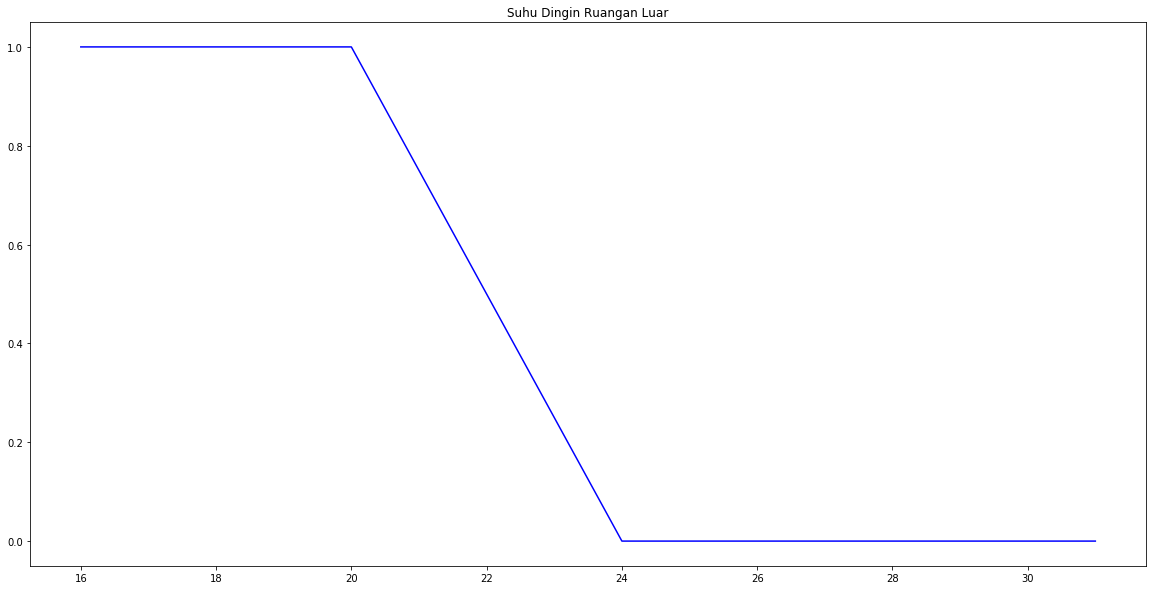

In [74]:
#keaggotaan dingin
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
luar_x = np.arange(16,32,1)
luar_dingin = fuzz.trapmf(luar_x, [16, 16, 20, 24])
ax0.plot(luar_x,luar_dingin,'blue')
ax0.set_title('Suhu Dingin Ruangan Luar')

###############################################################################################################################

####    b.) Fungsi keanggotaan Sensor Luar Sedang

\begin{equation}
  luar['sedang'] = \mu LuarSedang(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq28$}.\\
    (x - 20)/(24 - 20) , & \text{$20 \leq x \leq 24$}.\\
    (28 - x)/(28 - 24) , & \text{$24 \leq x \leq 28$}.\\
  \end{cases}
\end{equation}

        Mengisi membership function sensor suhu luar sedang

In [75]:
luar['sedang'] = fuzz.trimf(luar.universe, [20, 24, 28])

        Fungsi trimf untuk membentuk sebuah segitiga

        Menampilkan plot dari membership function sensor suhu luar dingin

Text(0.5, 1.0, 'Suhu Sedang Ruangan Luar')

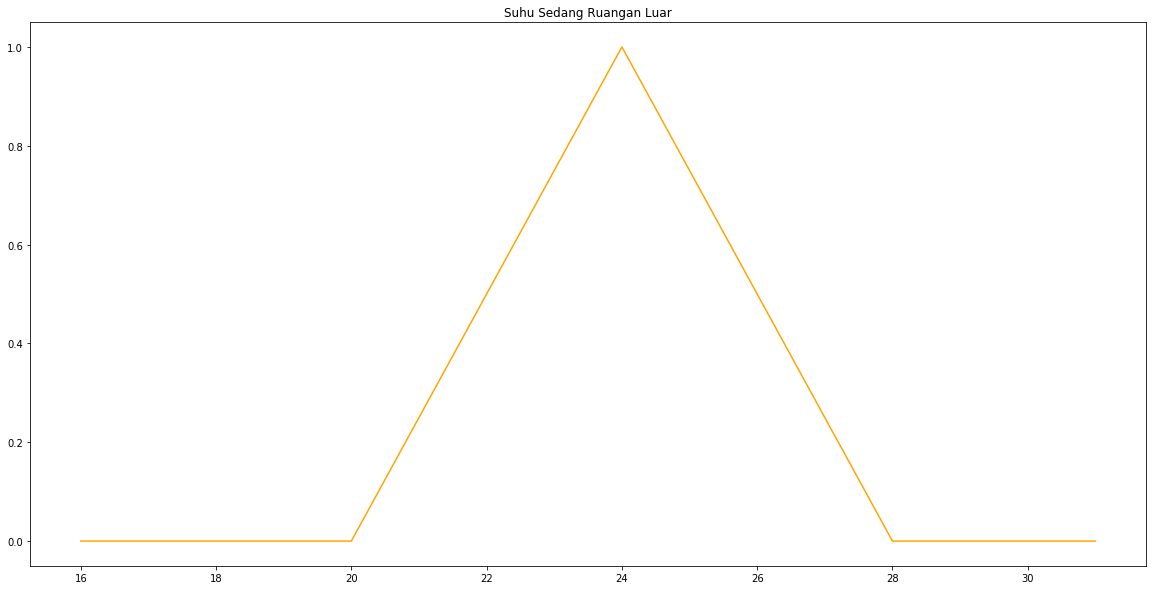

In [76]:
#keaggotaan sedang
fig, (ax1) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
luar_x = np.arange(16,32,1)
luar_sedang = fuzz.trimf(luar_x, [20, 24, 28])
ax1.plot(luar_x,luar_sedang,'orange')
ax1.set_title('Suhu Sedang Ruangan Luar')

###############################################################################################################################

####    c.) Fungsi keanggotaan Sensor Luar Panas

\begin{equation}
   luar['panas'] = \mu LuarPanas(x)=\begin{cases}
    0, & \text{$x\leq 24$}.\\
    (x - 28)/(28 - 24) , & \text{$24 \leq x \leq 28$}.\\
    1, & \text{$x\geq 28$}.
  \end{cases}
\end{equation}

        Mengisi membership function sensor suhu luar sedang

In [77]:
luar['panas'] = fuzz.trapmf(luar.universe, [24, 28, 32, 32])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function sensor suhu luar dingin

Text(0.5, 1.0, 'Suhu Sedang Ruangan Luar')

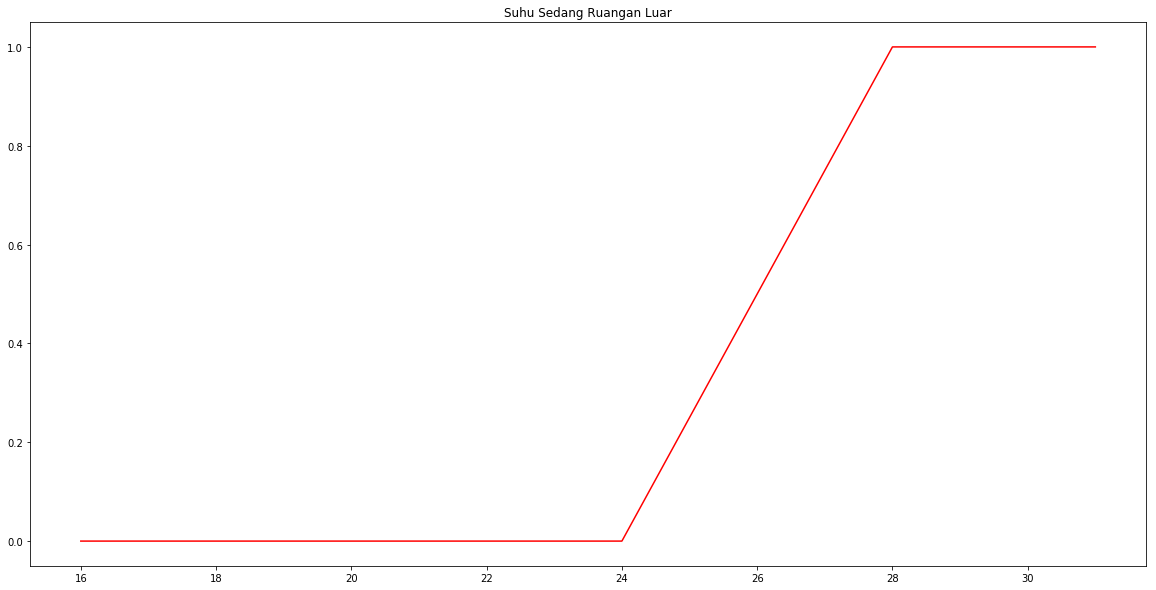

In [78]:
#keaggotaan panas
fig, (ax2) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
luar_x = np.arange(16,32,1)
luar_panas = fuzz.trapmf(luar_x, [24, 28, 32, 32])
ax2.plot(luar_x,luar_panas,'red')
ax2.set_title('Suhu Sedang Ruangan Luar')

###############################################################################################################################

####    d.) Fungsi keanggotaan Sensor Suhu Luar

Text(0.5, 1.0, 'PLOT MEMBERSHIP FUNCTION SUHU LUAR')

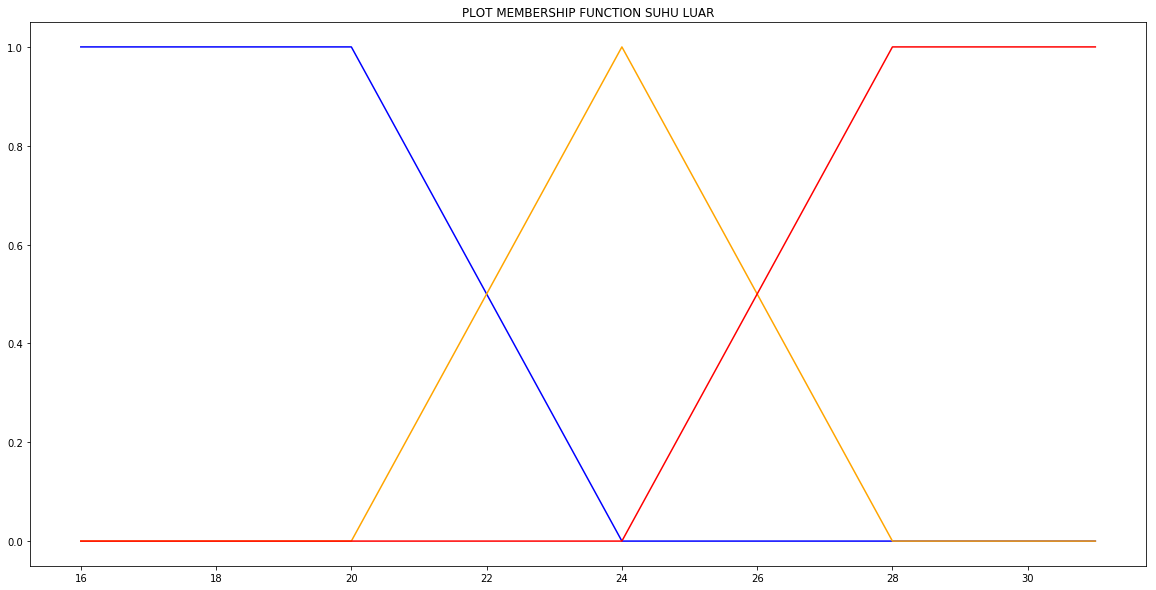

In [79]:
#keseluruhan
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
#keaggotaan dingin
ax3.plot(luar_x,luar_dingin,'blue')
#keaggotaan sedang
ax3.plot(luar_x,luar_sedang,'orange')
#keaggotaan panas
ax3.plot(luar_x,luar_panas,'red')
ax3.set_title('PLOT MEMBERSHIP FUNCTION SUHU LUAR')

#### MELAKUKAN PLOTTING MEMBERSHIP FUNCTION SUHU DALAM

####    a.) Fungsi keanggotaan Sensor Dalam Dingin

\begin{equation}
  dalam['dingin'] = \mu DalamDingin(x)=\begin{cases}
    1, & \text{$16\leq x\leq18$}.\\
    (22 - x)/(22 - 18) , & \text{$18 \leq x \leq 22$}.\\
    0, & \text{$x\geq 22$}.
 \end{cases}
 \end{equation}

        Mengisi membership function sensor suhu dalam dingin

In [80]:
dalam['dingin'] = fuzz.trapmf(dalam.universe, [16, 16, 18, 22])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function sensor suhu dalam dingin

Text(0.5, 1.0, 'Suhu Dingin Ruangan Dalam')

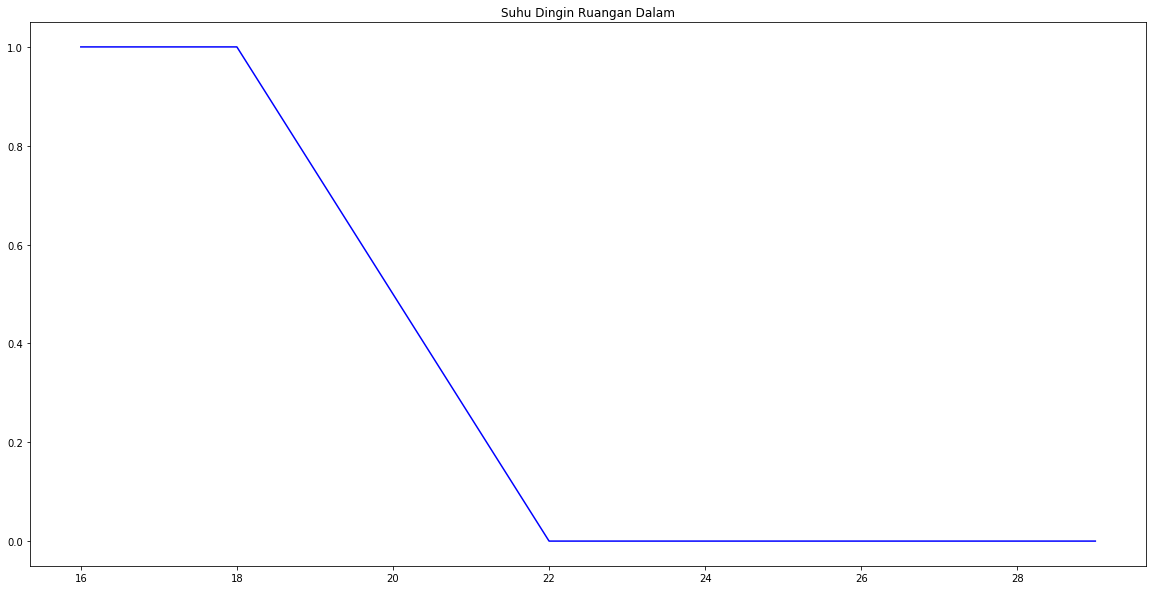

In [81]:
#keaggotaan dingin
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
dalam_x = np.arange(16,30,1)
dalam_dingin = fuzz.trapmf(dalam_x, [16, 16, 18, 22])
ax0.plot(dalam_x,dalam_dingin,'blue')
ax0.set_title('Suhu Dingin Ruangan Dalam')

###############################################################################################################################

####    b.) Fungsi keanggotaan Sensor Dalam Sedang

\begin{equation}
  dalam['sedang'] = \mu DalamSedang(x)=\begin{cases}
    0, & \text{$x\leq 18$ atau $x\geq26$}.\\
    (x - 18)/(22 - 18) , & \text{$18 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\\
 \end{cases}
 \end{equation}

        Mengisi membership function sensor suhu dalam sedang

In [82]:
dalam['sedang'] = fuzz.trimf(dalam.universe, [18, 22, 26])

        Fungsi trimf untuk membentuk sebuah segitiga

        Menampilkan plot dari membership function sensor suhu dalam sedang

Text(0.5, 1.0, 'Suhu Sedang Ruangan Dalam')

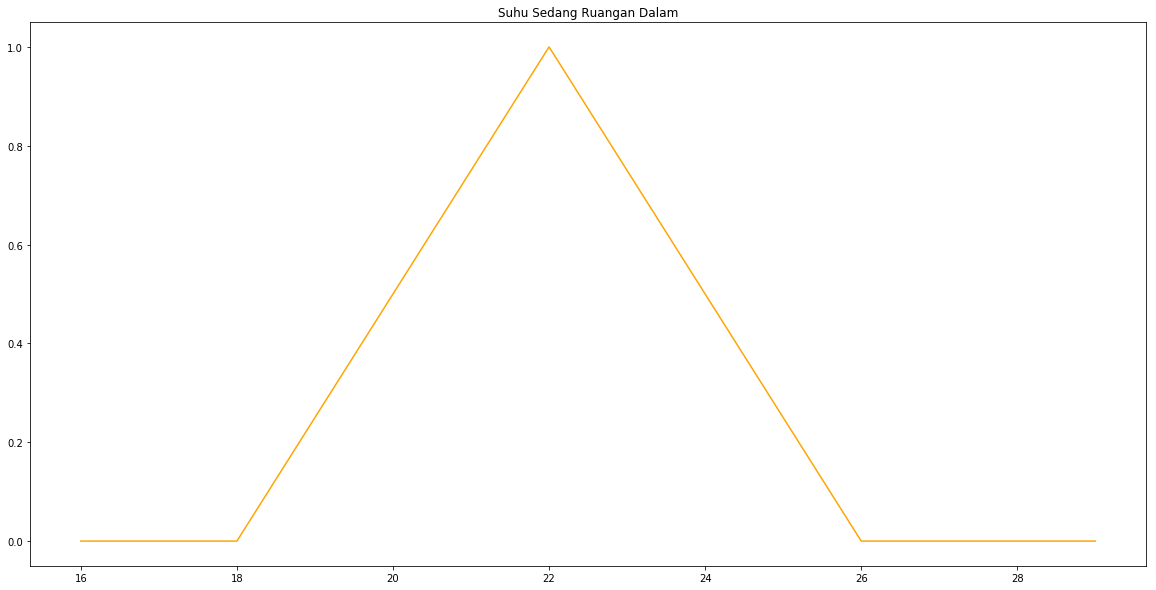

In [83]:
#keaggotaan sedang
fig, (ax1) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
dalam_x = np.arange(16,30,1)
dalam_sedang = fuzz.trimf(dalam_x, [18, 22, 26])
ax1.plot(dalam_x,dalam_sedang,'orange')
ax1.set_title('Suhu Sedang Ruangan Dalam')

###############################################################################################################################

####    c.) Fungsi keanggotaan Sensor Dalam Panas

\begin{equation}
   luar['panas'] = \mu DalamPanas(x)=\begin{cases}
    0, & \text{$x\leq 22$}.\\
    (x - 26)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\\
    1, & \text{$x\geq 26$}.
 \end{cases}
 \end{equation}

        Mengisi membership function sensor suhu dalam panas

In [84]:
dalam['panas'] = fuzz.trapmf(dalam.universe, [22, 26, 30, 30])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function sensor suhu dalam panas

Text(0.5, 1.0, 'Suhu Sedang Ruangan Dalam')

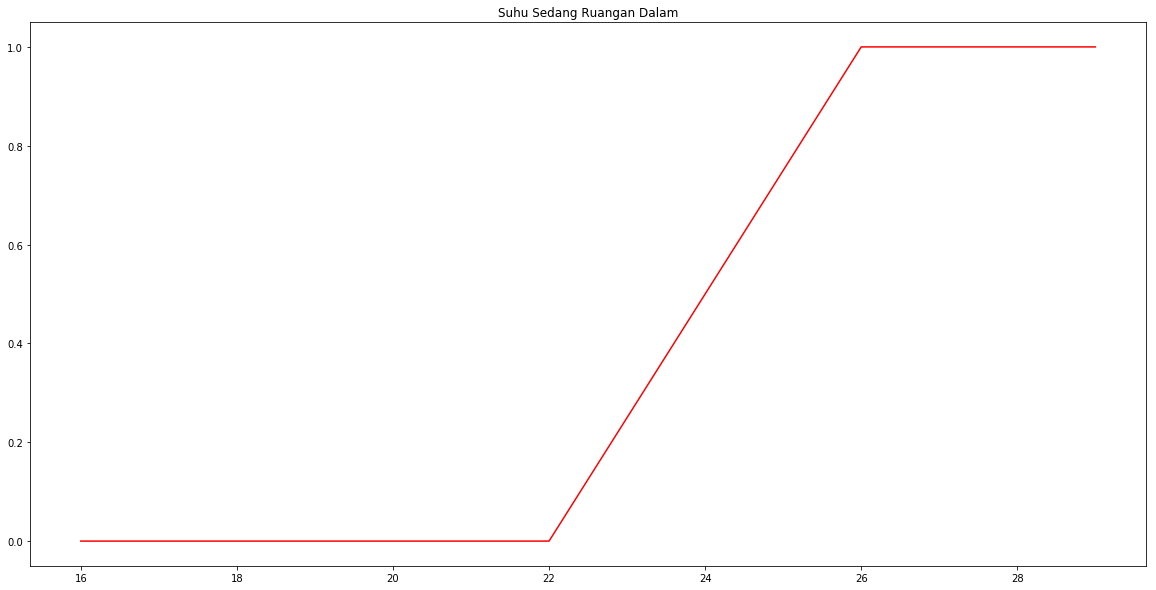

In [85]:
#keaggotaan panas
fig, (ax2) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
dalam_x = np.arange(16,30,1)
dalam_panas = fuzz.trapmf(dalam_x, [22, 26, 30, 30])
ax2.plot(dalam_x,dalam_panas,'red')
ax2.set_title('Suhu Sedang Ruangan Dalam')

###############################################################################################################################

####    d.) Fungsi keanggotaan Sensor Suhu Dalam

Text(0.5, 1.0, 'PLOT MEMBERSHIP FUNCTION SUHU DALAM')

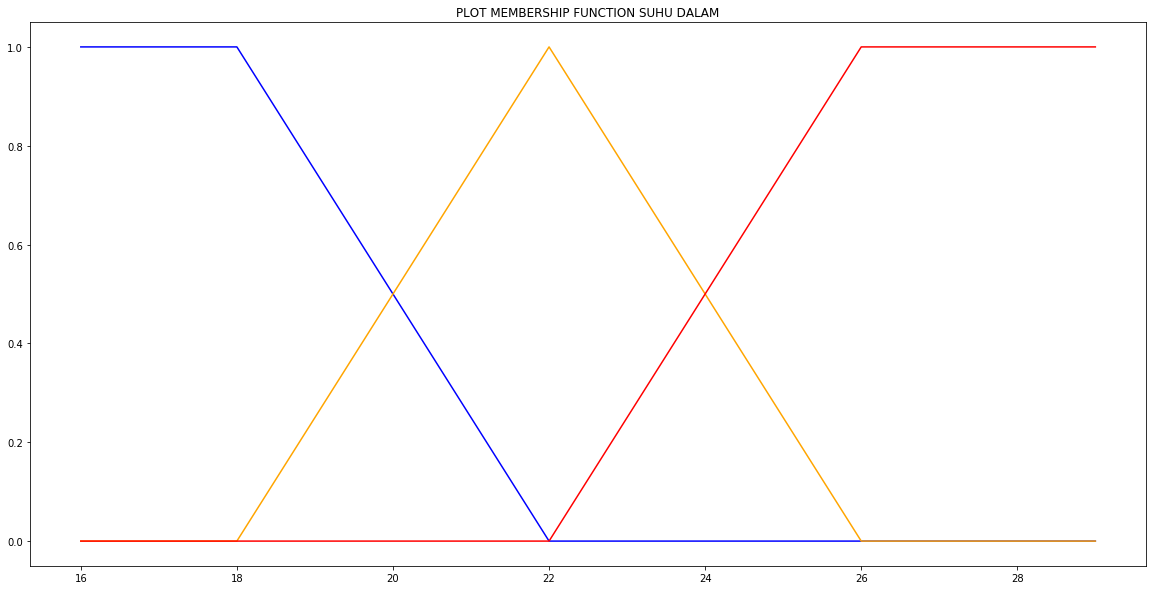

In [86]:
#keseluruhan
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
#keaggotaan dingin
ax3.plot(dalam_x,dalam_dingin,'blue')
#keaggotaan sedang
ax3.plot(dalam_x,dalam_sedang,'orange')
#keaggotaan panas
ax3.plot(dalam_x,dalam_panas,'red')
ax3.set_title('PLOT MEMBERSHIP FUNCTION SUHU DALAM')

#### MELAKUKAN PLOTTING MEMBERSHIP FUNCTION JUMLAH MANUSIA

####    a.) Fungsi keanggotaan Sensor Jumlah Manusia Sedikit

\begin{equation}
  manusia['sedikit'] = \mu ManusiaSedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq10$}.\\
    (20 - x)/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.
 \end{cases}
 \end{equation}

        Mengisi membership function sensor jumlah manusia sedikit

In [87]:
manusia['sedikit'] = fuzz.trapmf(manusia.universe, [0, 0, 10, 20])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function sensor jumlah manusia sedikit

Text(0.5, 1.0, 'Manusia Sedikit')

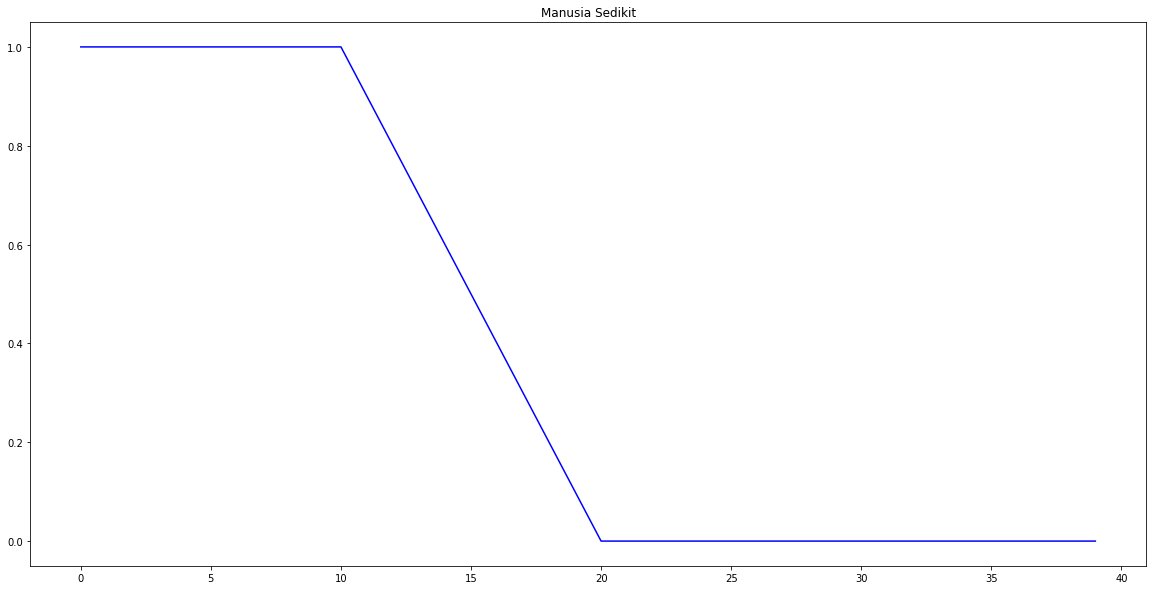

In [88]:
#keanggotaan sedikit
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
dalam_x = np.arange(16,50,1)
manusia_sedikit = fuzz.trapmf(manusia_x, [0, 0, 10, 20])
ax0.plot(manusia_x,manusia_sedikit,'blue')
ax0.set_title('Manusia Sedikit')

###############################################################################################################################

####    b.) Fungsi keanggotaan Sensor Jumlah Manusia Sedang

\begin{equation}
  manusia['sedang'] = \mu ManusiaSedang(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq30$}.\\
    (x - 10)/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    (30 - x)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
 \end{cases}
 \end{equation}

        Mengisi membership function sensor jumlah manusia sedang

In [89]:
manusia['sedang'] = fuzz.trimf(manusia.universe, [10, 20, 30])

        Fungsi trimf untuk membentuk sebuah segitiga

        Menampilkan plot dari membership function sensor jumlah manusia sedang

Text(0.5, 1.0, 'Manusia Sedang')

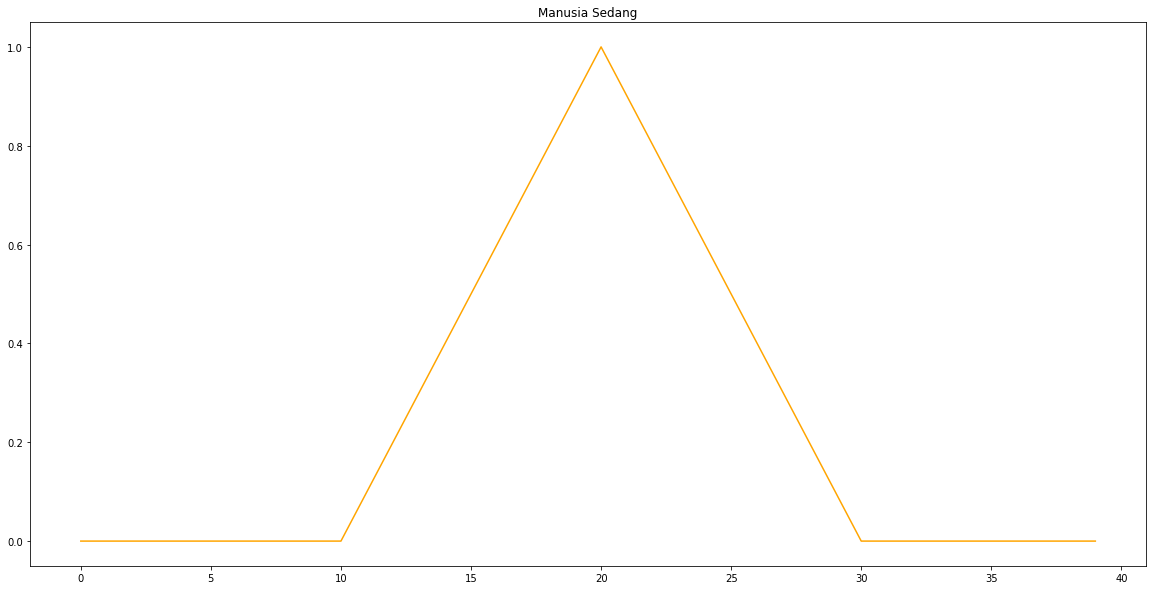

In [90]:
#keanggotaan sedang
fig, (ax1) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
dalam_x = np.arange(16,50,1)
manusia_sedang = fuzz.trimf(manusia_x, [10, 20, 30])
ax1.plot(manusia_x,manusia_sedang,'orange')
ax1.set_title('Manusia Sedang')

###############################################################################################################################

####    c.) Fungsi keanggotaan Sensor Jumlah Manusia Banyak

\begin{equation}
   manusia['banyak'] = \mu ManusiaBanyak(x)=\begin{cases}
    0, & \text{$x\leq 30$}.\\
    (x - 20)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
    1, & \text{$x\geq 30$}.
 \end{cases}
 \end{equation}

        Mengisi membership function sensor jumlah manusia banyak

In [91]:
manusia['banyak'] = fuzz.trapmf(manusia.universe, [20, 30, 40, 40])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function sensor jumlah manusia banyak

Text(0.5, 1.0, 'Manusia Banyak')

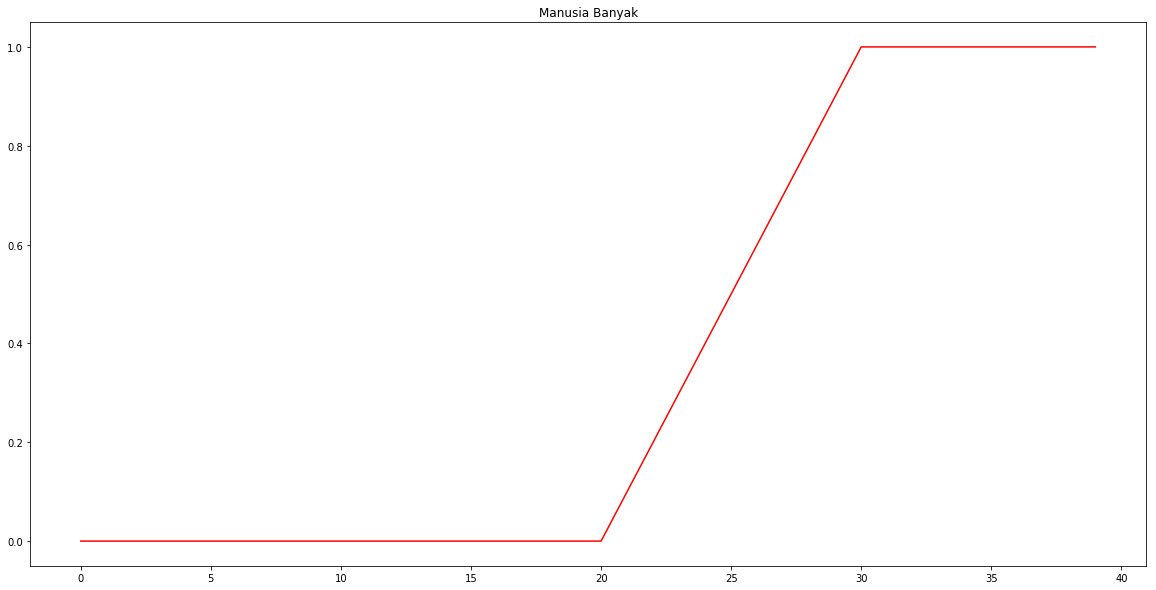

In [92]:
#keanggotaan banyak
fig, (ax2) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
dalam_x = np.arange(16,50,1)
manusia_banyak = fuzz.trapmf(manusia_x, [20, 30, 40, 40])
ax2.plot(manusia_x,manusia_banyak,'red')
ax2.set_title('Manusia Banyak')

###############################################################################################################################

####    d.) Fungsi keanggotaan Sensor Jumlah Manusia

Text(0.5, 1.0, 'PLOT MEMBERSHIP FUNCTION JUMLAH MANUSIA')

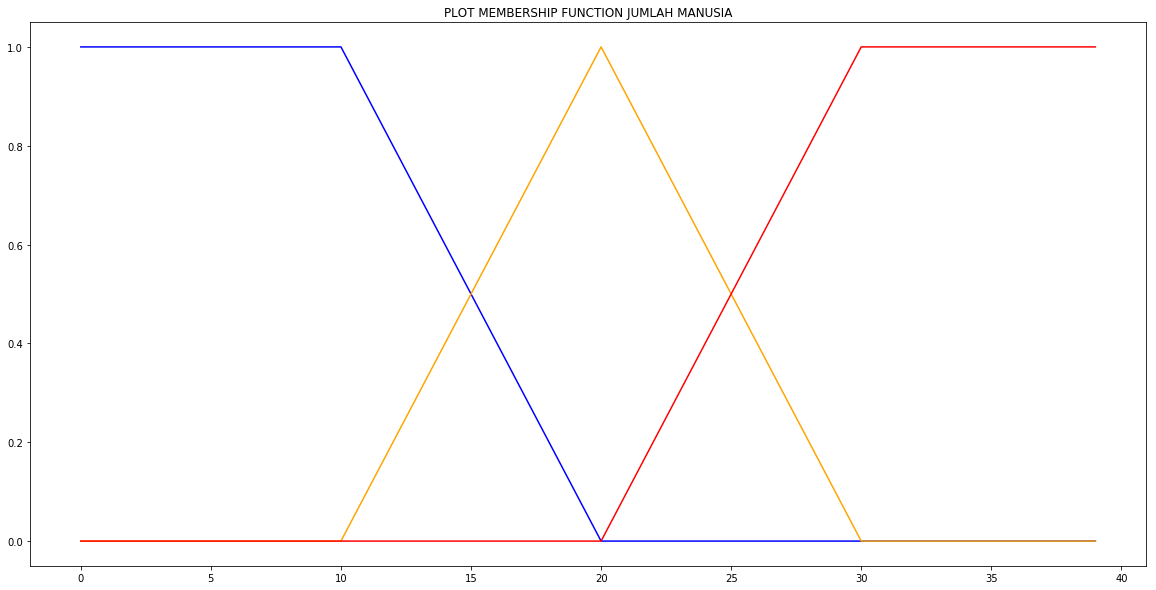

In [93]:
#keseluruhan
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
#keaggotaan dingin
ax3.plot(manusia_x,manusia_sedikit,'blue')
#keaggotaan sedang
ax3.plot(manusia_x,manusia_sedang,'orange')
#keaggotaan panas
ax3.plot(manusia_x,manusia_banyak,'red')
ax3.set_title('PLOT MEMBERSHIP FUNCTION JUMLAH MANUSIA')

### OUTPUT

#### MELAKUKAN PLOTTING MEMBERSHIP FUNCTION KOMPRESOR

####    a.) Fungsi keanggotaan Kompresor Lambat

\begin{equation}
  kompresor['lambat'] = \mu Lambat(x)=\begin{cases}
    1, & \text{$0\leq x\leq36$}.\\
    (127 - x)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    0, & \text{$x\geq 127$}.
 \end{cases}
 \end{equation}

        Mengisi membership function kecepatan putaran kompresor lambat

In [94]:
kompresor['lambat'] = fuzz.trapmf(kompresor.universe, [0, 0, 36, 127])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function kecepatan putaran kompresor lambat

Text(0.5, 1.0, 'PWM Kecepatan Kompresor Lambat')

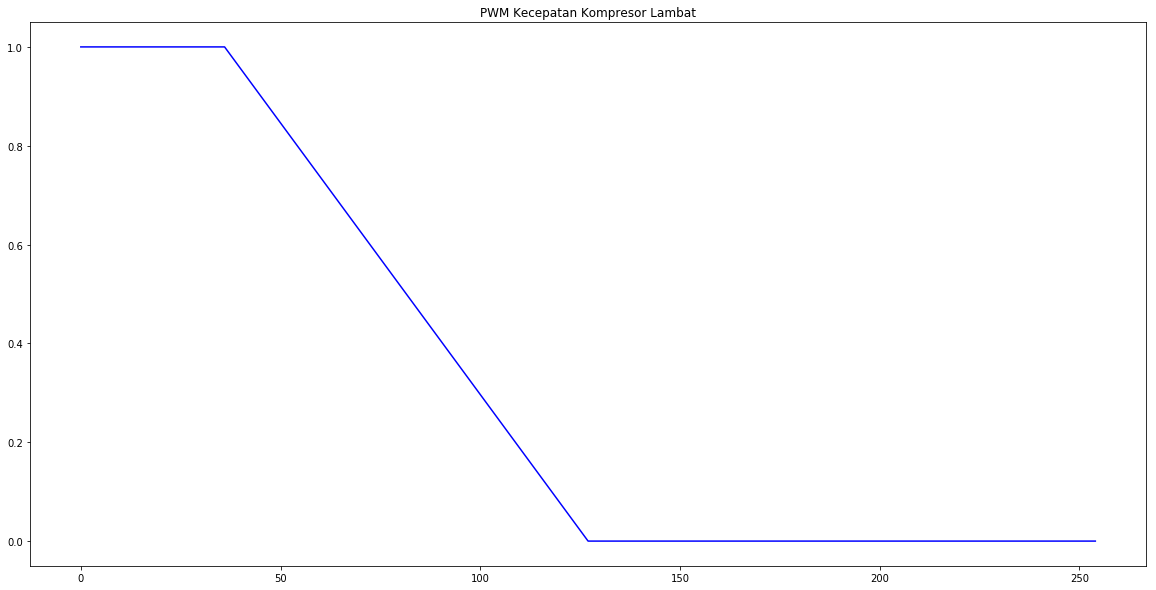

In [95]:
#keanggotaan lambat
fig, (ax0) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
kompresor_x = np.arange(0,255,1)
kompresor_lambat = fuzz.trapmf(kompresor_x, [0, 0, 36, 127])
ax0.plot(kompresor_x,kompresor_lambat,'blue')
ax0.set_title('PWM Kecepatan Kompresor Lambat')

###############################################################################################################################

####    b.) Fungsi keanggotaan Kompresor Sedang

\begin{equation}
  kompresor['sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 36$ atau $x\geq218$}.\\
    (x - 36)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    (218 - x)/(218 - 127) , & \text{$127 \leq x \leq 218$}.\\
 \end{cases}
 \end{equation}

        Mengisi membership function kecepatan putaran kompresor sedang

In [96]:
kompresor['sedang'] = fuzz.trimf(kompresor.universe, [36, 127, 218])

        Fungsi trimf untuk membentuk sebuah segitiga

        Menampilkan plot dari membership function kecepatan putaran kompresor sedang

Text(0.5, 1.0, 'PWM Kecepatan Kompresor Sedang')

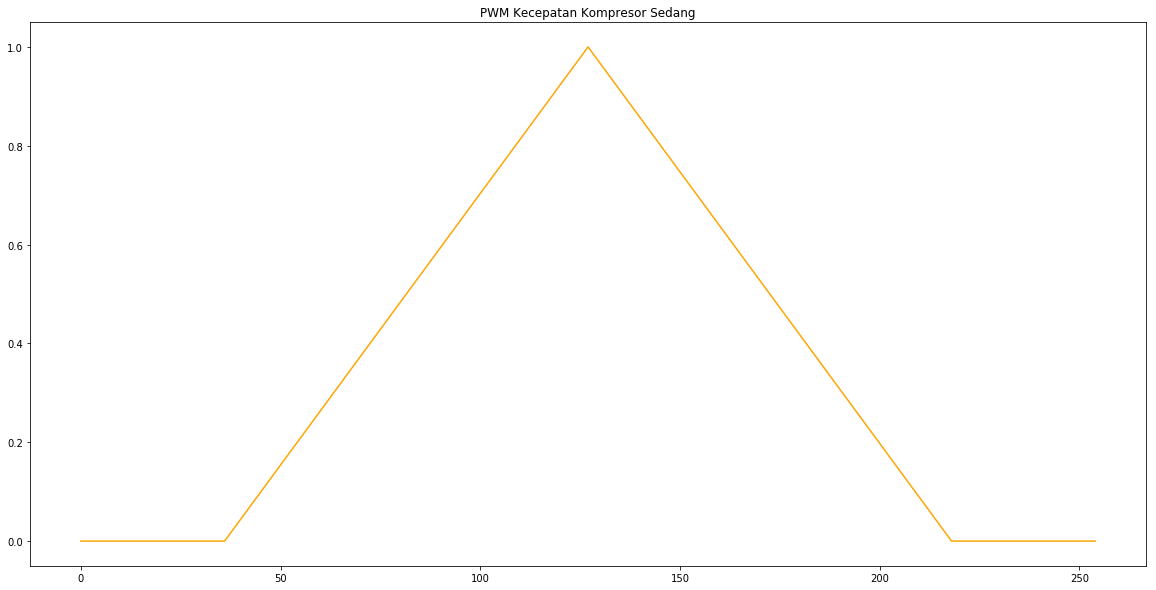

In [97]:
#keanggotaan sedang
fig, (ax1) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
kompresor_x = np.arange(0,255,1)
kompresor_sedang = fuzz.trimf(kompresor_x, [36, 127, 218])
ax1.plot(kompresor_x,kompresor_sedang,'orange')
ax1.set_title('PWM Kecepatan Kompresor Sedang')

###############################################################################################################################

####    c.) Fungsi keanggotaan Kompresor Cepat

\begin{equation}
   kompresor['cepat'] = \mu Cepat(x)=\begin{cases}
    0, & \text{$x\leq 218$}.\\
    (x - 127)/(218 - 127) , & \text{$127 \leq x \leq 218$}.\\
    1, & \text{$x\geq 218$}.
 \end{cases}
 \end{equation}

        Mengisi membership function kecepatan putaran kompresor cepat

In [98]:
kompresor['cepat'] = fuzz.trapmf(kompresor.universe, [127, 218, 255, 255])

        Fungsi trapmf untuk membentuk sebuah trapesium

        Menampilkan plot dari membership function kecepatan putaran kompresor cepat

Text(0.5, 1.0, 'PWM Kecepatan Kompresor Cepat')

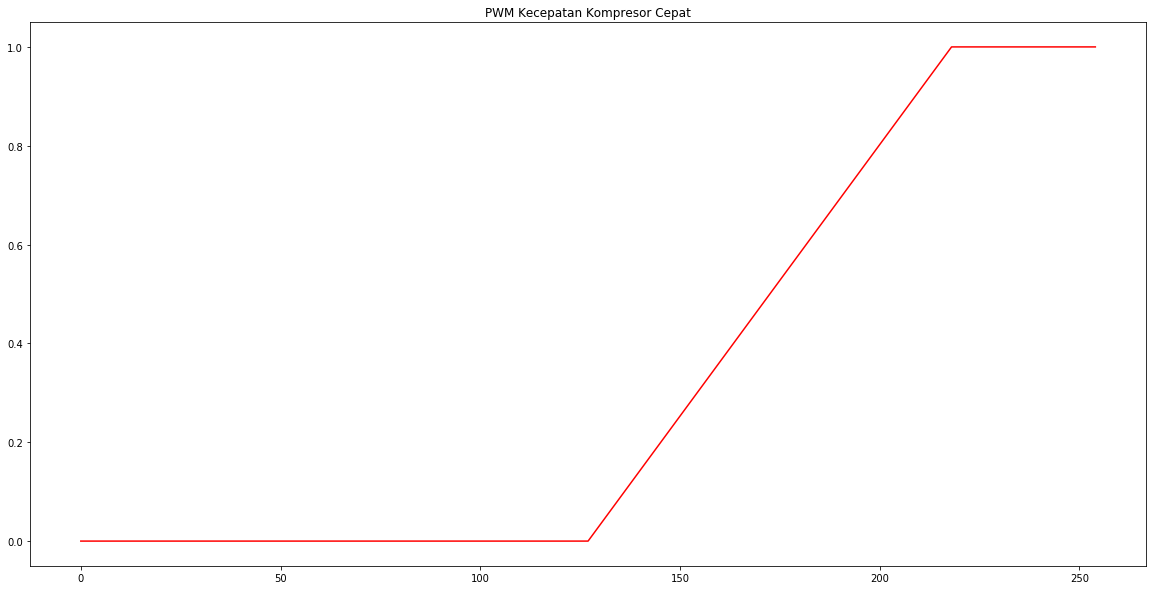

In [99]:
#keanggotaan cepat
fig, (ax2) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
kompresor_x = np.arange(0,255,1)
kompresor_cepat = fuzz.trapmf(kompresor_x, [127, 218, 255, 255])
ax2.plot(kompresor_x,kompresor_cepat,'red')
ax2.set_title('PWM Kecepatan Kompresor Cepat')

###############################################################################################################################

####    d.) Fungsi keanggotaan Sensor Suhu Dalam

Text(0.5, 1.0, 'PLOT MEMBERSHIP FUNCTION PWM KOMPRESOR')

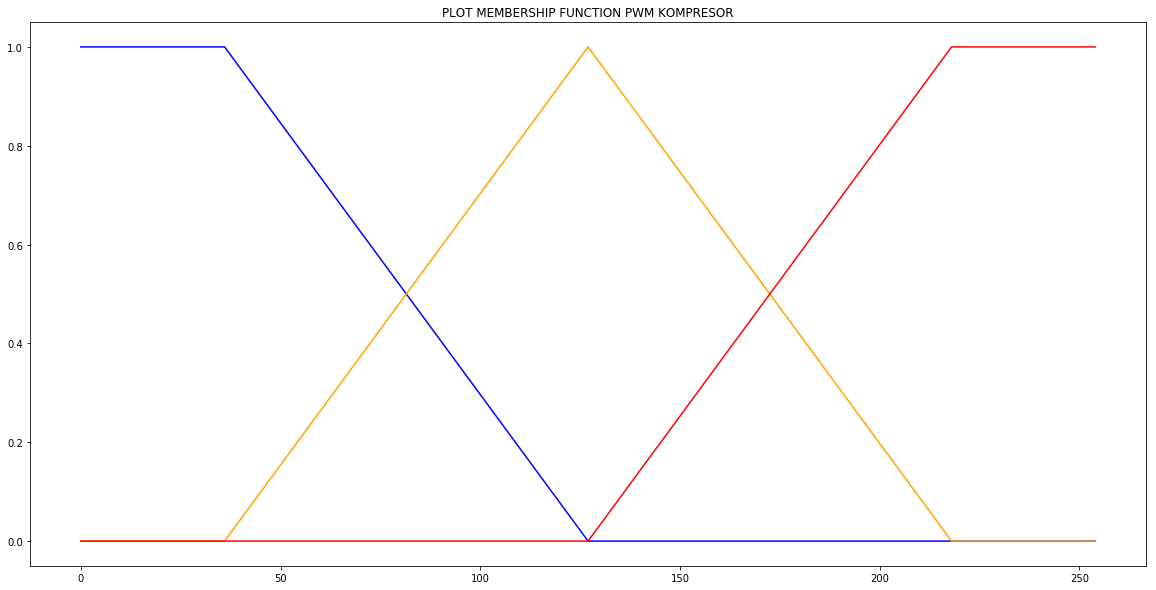

In [100]:
#keseluruhan
fig, (ax3) = plt.subplots(nrows= 1 ,facecolor='white', figsize=(20, 10))
#keaggotaan dingin
ax3.plot(kompresor_x,kompresor_lambat,'blue')
#keaggotaan sedang
ax3.plot(kompresor_x,kompresor_sedang,'orange')
#keaggotaan panas
ax3.plot(kompresor_x,kompresor_cepat,'red')
ax3.set_title('PLOT MEMBERSHIP FUNCTION PWM KOMPRESOR')

### 3. RULE BASE / INFERENCING

Pada bagian ini, merupakan mengatur ketentuan untuk hasil output berdasarkan inputtan yang dibuat. Jumlah rule base sendiri tidak dapat ditentukan sembarangan, melainkan harus sesuai dengan perhitungan yaitu:

$$JUMLAH\ RULE\ BASE=\ \left(BANYAKNYA\ MASUKKAN\right)^{\left(BANYAKNYA\ KLASIFIKASI\right)}$$
$$JUMLAH\ RULE\ BASE=3^3$$
$$JUMLAH\ RULE\ BASE=27$$

Sehingga, pada sistem ini rule base yang digunakan yaitu berjumlah 27. Berikut ini rule base yang ditampilkan di dalam tabel

In [101]:
TABEL = [['RULE','SUHU DALAM','SUHU LUAR','MANUSIA','KOMPRESOR'],
         ['rule1','dingin','dingin','sedikit','lambat'],
         ['rule2','dingin','dingin','sedang','lambat'],
         ['rule3','dingin','dingin','banyak','sedang'],
         ['rule4','dingin','sedang','sedikit','lambat'],
         ['rule5','dingin','sedang','sedang','sedang'],
         ['rule6','dingin','sedang','banyak','cepat'],
         ['rule7','dingin','panas','sedikit','sedang'],
         ['rule8','dingin','panas','sedang','cepat'],
         ['rule9','dingin','panas','banyak','cepat'],
         ['rule10','sedang','dingin','sedikit','lambat'],
         ['rule11','sedang','dingin', 'sedang','sedang'],
         ['rule12','sedang','dingin','banyak','sedang'],
         ['rule13','sedang','sedang','sedikit','lambat'],
         ['rule14','sedang','sedang','sedang','cepat'],
         ['rule15','sedang','sedang','banyak','cepat'],
         ['rule16','sedang','panas','sedikit','sedang'],
         ['rule17','sedang','panas','sedang','cepat'],
         ['rule18','sedang','panas','banyak','cepat'],
         ['rule19','panas','dingin','sedikit','lambat'],
         ['rule20','panas','dingin','sedang','lambat'],
         ['rule21','panas','dingin','banyak','lambat'],
         ['rule22','panas','sedang','sedikit','sedang'],
         ['rule23','panas','sedang','sedang','cepat'],
         ['rule24','panas','sedang','banyak','cepat'],
         ['rule25','panas','panas','sedikit','sedang'],
         ['rule26','panas','panas','sedang','cepat'],
         ['rule27','panas','panas','banyak','cepat']]

TABEL = pd.DataFrame(TABEL)
TABEL

,0,1,2,3,4
0,RULE,SUHU DALAM,SUHU LUAR,MANUSIA,KOMPRESOR
1,rule1,dingin,dingin,sedikit,lambat
2,rule2,dingin,dingin,sedang,lambat
3,rule3,dingin,dingin,banyak,sedang
4,rule4,dingin,sedang,sedikit,lambat
5,rule5,dingin,sedang,sedang,sedang
6,rule6,dingin,sedang,banyak,cepat
7,rule7,dingin,panas,sedikit,sedang
8,rule8,dingin,panas,sedang,cepat
9,rule9,dingin,panas,banyak,cepat


Pada rule base, digunakan fungsi min dikarenakan rule base yang digunakan menggunakan AND

In [102]:
rule1 = ctrl.Rule(luar['dingin'] & dalam['dingin'] & manusia['sedikit'], kompresor['lambat'])
rule2 = ctrl.Rule(luar['dingin'] & dalam['dingin'] & manusia['sedang'], kompresor['lambat'])
rule3 = ctrl.Rule(luar['dingin'] & dalam['dingin'] & manusia['banyak'], kompresor['sedang'])

rule4 = ctrl.Rule(luar['dingin'] & dalam['sedang'] & manusia['sedikit'], kompresor['lambat'])
rule5 = ctrl.Rule(luar['dingin'] & dalam['sedang'] & manusia['sedang'], kompresor['sedang'])
rule6 = ctrl.Rule(luar['dingin'] & dalam['sedang'] & manusia['banyak'], kompresor['cepat'])

rule7 = ctrl.Rule(luar['dingin'] & dalam['panas'] & manusia['sedikit'], kompresor['sedang'])
rule8 = ctrl.Rule(luar['dingin'] & dalam['panas'] & manusia['sedang'], kompresor['cepat'])
rule9 = ctrl.Rule(luar['dingin'] & dalam['panas'] & manusia['banyak'], kompresor['cepat'])

rule10 = ctrl.Rule(luar['sedang'] & dalam['dingin'] & manusia['sedikit'], kompresor['lambat'])
rule11 = ctrl.Rule(luar['sedang'] & dalam['dingin'] & manusia['sedang'], kompresor['sedang'])
rule12 = ctrl.Rule(luar['sedang'] & dalam['dingin'] & manusia['banyak'], kompresor['sedang'])

rule13 = ctrl.Rule(luar['sedang'] & dalam['sedang'] & manusia['sedikit'], kompresor['lambat'])
rule14 = ctrl.Rule(luar['sedang'] & dalam['sedang'] & manusia['sedang'], kompresor['cepat'])
rule15 = ctrl.Rule(luar['sedang'] & dalam['sedang'] & manusia['banyak'], kompresor['cepat'])

rule16 = ctrl.Rule(luar['sedang'] & dalam['panas'] & manusia['sedikit'], kompresor['sedang'])
rule17 = ctrl.Rule(luar['sedang'] & dalam['panas'] & manusia['sedang'], kompresor['cepat'])
rule18 = ctrl.Rule(luar['sedang'] & dalam['panas'] & manusia['banyak'], kompresor['cepat'])

rule19 = ctrl.Rule(luar['panas'] & dalam['dingin'] & manusia['sedikit'], kompresor['lambat'])
rule20 = ctrl.Rule(luar['panas'] & dalam['dingin'] & manusia['sedang'], kompresor['lambat'])
rule21 = ctrl.Rule(luar['panas'] & dalam['dingin'] & manusia['banyak'], kompresor['lambat'])

rule22 = ctrl.Rule(luar['panas'] & dalam['sedang'] & manusia['sedikit'], kompresor['sedang'])
rule23 = ctrl.Rule(luar['panas'] & dalam['sedang'] & manusia['sedang'], kompresor['cepat'])
rule24 = ctrl.Rule(luar['panas'] & dalam['sedang'] & manusia['banyak'], kompresor['cepat'])

rule25 = ctrl.Rule(luar['panas'] & dalam['panas'] & manusia['sedikit'], kompresor['sedang'])
rule26 = ctrl.Rule(luar['panas'] & dalam['panas'] & manusia['sedang'], kompresor['cepat'])
rule27 = ctrl.Rule(luar['panas'] & dalam['panas'] & manusia['banyak'], kompresor['cepat'])

##### Rulebase yang telah dibuat juga dapat dilihat bentuk visualisasinya. Terdapat cara menampilkan visualisasi rule, yaitu:
1. dengan view_n

dimana tampilan plot memiliki keterangan mengenai distribusi dari input ke output. Sebagai contoh, pada rule 1 masukkan manusia mengenai sedang dan banyak berwarna merah yang berarti bukan termasuk 
bagian, sedangkan sedikit masuk ke dalam bagian. Output dari gambar plot tersebut menuju kompresor.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22f3c7d8f60>)

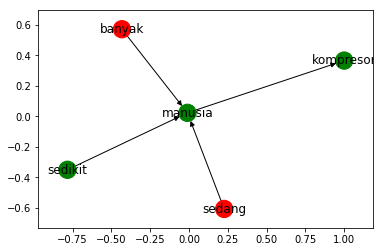

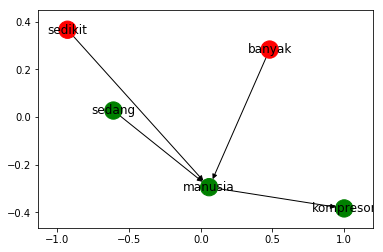

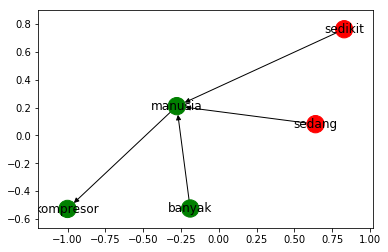

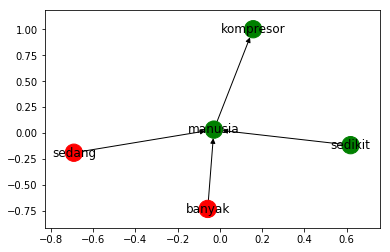

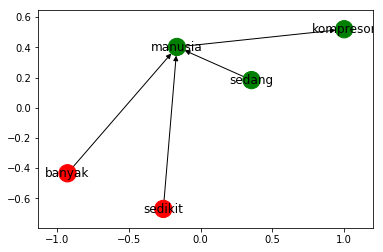

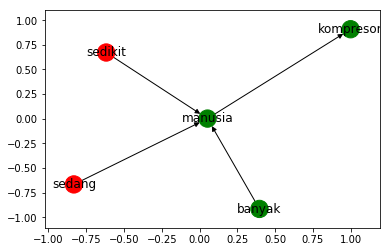

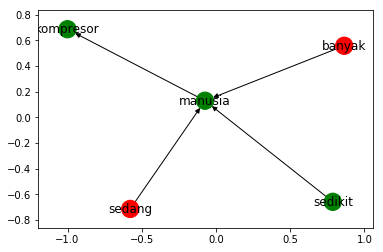

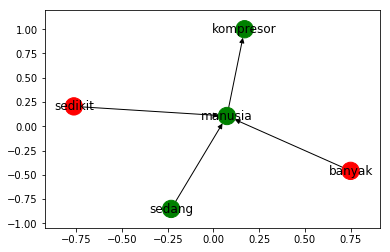

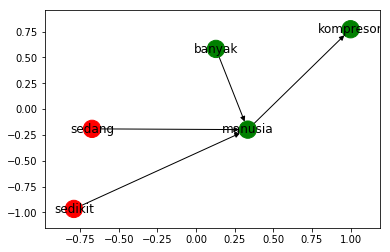

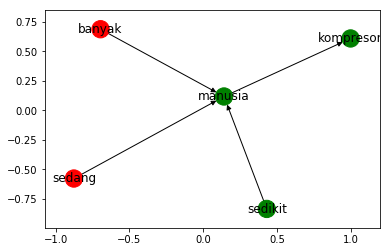

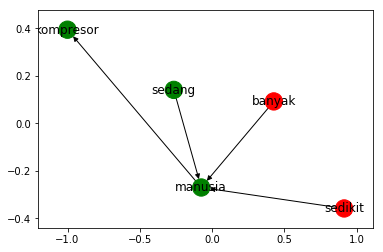

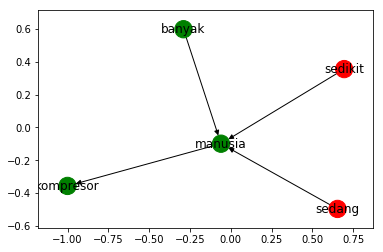

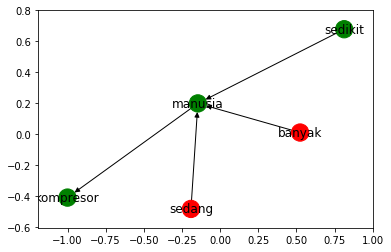

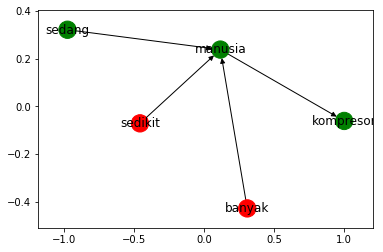

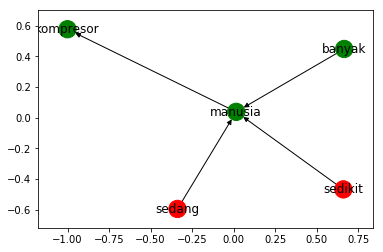

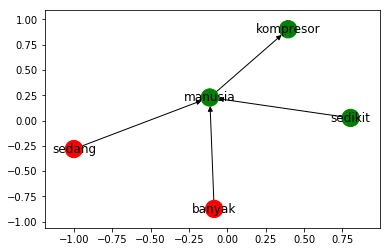

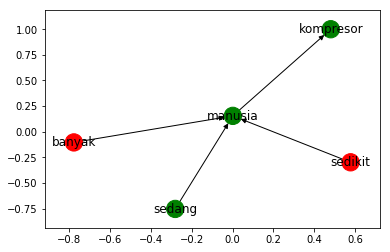

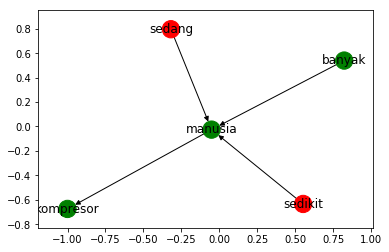

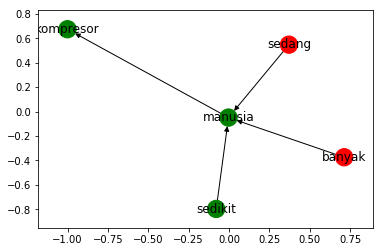

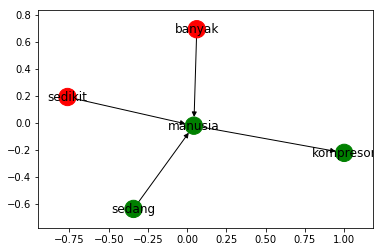

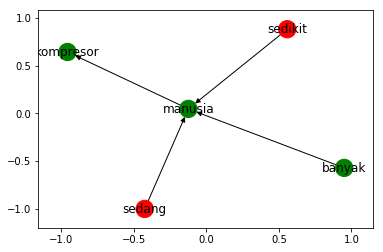

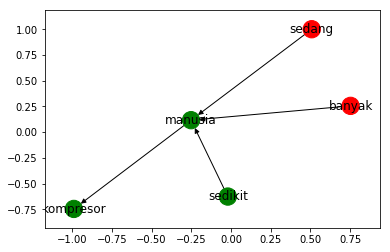

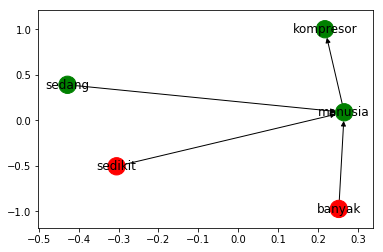

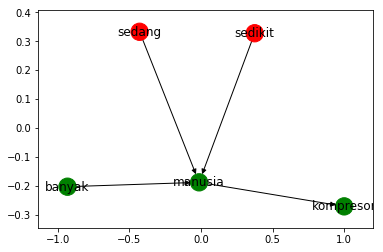

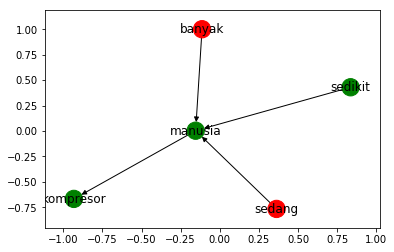

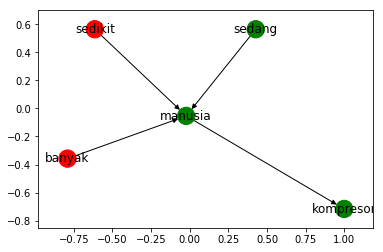

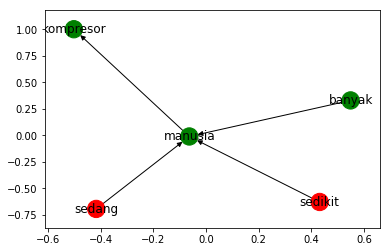

In [103]:
rule1.view_n()
rule2.view_n()
rule3.view_n()
rule4.view_n()
rule5.view_n()
rule6.view_n()
rule7.view_n()
rule8.view_n()
rule9.view_n()
rule10.view_n()
rule11.view_n()
rule12.view_n()
rule13.view_n()
rule14.view_n()
rule15.view_n()
rule16.view_n()
rule17.view_n()
rule18.view_n()
rule19.view_n()
rule20.view_n()
rule21.view_n()
rule22.view_n()
rule23.view_n()
rule24.view_n()
rule25.view_n()
rule26.view_n()
rule27.view_n()

### 4. RULE EVALUATION

Setelah dibuat rule base, maka dapat dibuat juga sistem kontrolnya yang nantinya digunakan pada saat uji coba dari sistem fuzzy ini

In [105]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])

### 5. DEFUZZIFIKASI

In [106]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Melakukan inputtan

In [107]:
tipping.input['luar'] = 21
tipping.input['dalam'] = 23
tipping.input['manusia'] = 9

Melakukan proses penghitungan defuzzifikasi dan mencetak output yaitu nilai PWM

In [108]:
tipping.compute()
print('Kecepatan kompresor / PWM')
print(tipping.output['kompresor'])

Kecepatan kompresor / PWM
76.24862313724036


Melakukan plotting fungsi keangggotaan suhu setelah dimasukkan input nilai pada suhu luar

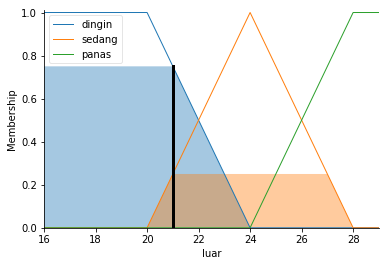

In [109]:
luar.view(sim=tipping)

Plotting fungsi keangggotaan suhu setelah dimasukkan input nilai pada suhu

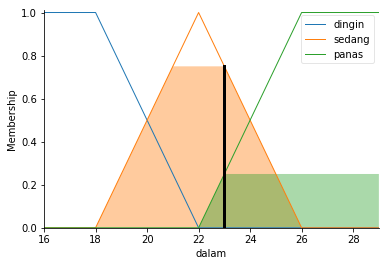

In [110]:
dalam.view(sim=tipping)

Melakukan Plotting fungsi keangggotaan suhu setelah dimasukkan input nilai pada jumlah manusia

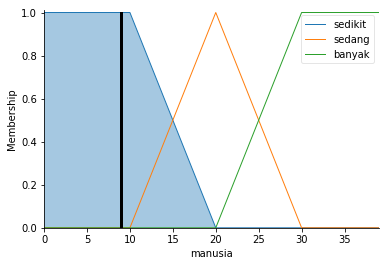

In [111]:
manusia.view(sim=tipping)

Melakukan plotting untuk melihat gambar grafik berdasarkan output yang sudah di defuzzifikasi

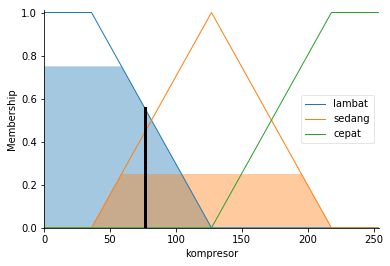

In [112]:
kompresor.view(sim=tipping)

------

### 6. Pengitungan Manual

Pada penghitungan manual, dari yang diambil defuxifikasi sebagai acuan komparasi, Diketahui:

    a. Suhu Luar = 21
    b. Suhu Dalam = 23
    c. Jumlah Manusia = 9
    
Dari jumlah tersebut, buatlah penghitungan manual fuzzy tersebut.

Masukkan nilai suhu luar kedalam fungsi keanggotaan suhu:

###############################################################################################################################


    a. Suhu Luar = 21
    
\begin{equation}
  luar['dingin'] = \mu LuarDingin(x)=\begin{cases}
    1, & \text{$16\leq x\leq20$}.\\
    (24 - x)/(24 - 20) , & \text{$20 \leq x \leq 24$}.\checkmark\\
    0, & \text{$x\geq 24$}. 
  \end{cases}
  \\
    luar['sedang'] = \mu LuarSedang(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x\geq30$}.\\
    (x - 20)/(24 - 20) , & \text{$20 \leq x \leq 24$}.\checkmark\\
    (28 - x)/(28 - 24) , & \text{$24 \leq x \leq 28$}.\\
    \end{cases}
  \\
   luar['panas'] = \mu LuarPanas(x)=\begin{cases}
    0, & \text{$x\leq 24$}.\checkmark\\
    (x - 28)/(28 - 24) , & \text{$24 \leq x \leq 28$}.\\
    1, & \text{$x\geq 28$}.
  \end{cases}
\end{equation}

\begin{equation}
 \mu LuarDingin(21) = (24 - x)/(24 - 20)\\
 \mu LuarDingin(21) = (24 - 21)/(24 - 20)\\
 \mu LuarDingin(21) = (3)/(4)\\
 \mu LuarDingin(21) = 0.75\\
\end{equation}

\begin{equation}
 \mu LuarSedang(21) = (x - 20)/(24 - 20)\\
 \mu LuarSedang(21) = (21 - 20)/(24 - 20)\\
 \mu LuarSedang(21) = (1)/(4)\\
 \mu LuarSedang(21) = 0.25\\
\end{equation}

\begin{equation}
 \mu LuarPanas(x) = 0\\
\end{equation}

###############################################################################################################################

    b. Suhu Dalam = 23

\begin{equation}
  dalam['dingin'] = \mu DalamDingin(x)=\begin{cases}
    1, & \text{$16\leq x\leq18$}.\\
    (22 - x)/(22 - 18) , & \text{$18 \leq x \leq 22$}.\\
    0, & \text{$x\geq 22$}.\checkmark\\
  \end{cases}
  \\
  dalam['sedang'] = \mu DalamSedang(x)=\begin{cases}
    0, & \text{$x\leq 18$ atau $x\geq26$}.\\
    (x - 18)/(22 - 18) , & \text{$18 \leq x \leq 22$}.\\
    (26 - x)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\checkmark\\
  \end{cases}
  \\
   luar['panas'] = \mu DalamPanas(x)=\begin{cases}
    0, & \text{$x\leq 22$}.\\
    (x - 22)/(26 - 22) , & \text{$22 \leq x \leq 26$}.\checkmark\\
    1, & \text{$x\geq 26$}.\\
  \end{cases}
\end{equation}

\begin{equation}
 \mu DalamDingin(x) = 0\\
\end{equation}

\begin{equation}
 \mu DalamSedang(23) = (26 - x)/(26 - 22)\\
 \mu DalamSedang(23) = (26 - 23)/(26 - 22)\\
 \mu DalamSedang(23) = (3)/(4)\\
 \mu DalamSedang(23) = 0.75\\
\end{equation}

\begin{equation}
 \mu DalamPanas(23) = (x - 22)/(26 - 22)\\
 \mu DalamPanas(23) = (23 - 22)/(26 - 22)\\
 \mu DalamPanas(23) = (1)/(4)\\
 \mu DalamPanas(23) = 0.25\\
\end{equation}

###############################################################################################################################

    c. Jumlah Manusia = 9

\begin{equation}
  manusia['sedikit'] = \mu ManusiaSedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq10$}.\checkmark\\
    (20 - x)/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.\\
  \end{cases}
  \\
  manusia['sedang'] = \mu ManusiaSedang(x)=\begin{cases}
    0, & \text{$x\leq 10$ atau $x\geq30$}.\checkmark\\
    (x - 10)/(20 - 10) , & \text{$10 \leq x \leq 20$}.\\
    (30 - x)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
  \end{cases}
  \\
   manusia['banyak'] = \mu ManusiaBanyak(x)=\begin{cases}
    0, & \text{$x\leq 20$}.\checkmark\\
    (x - 20)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
    1, & \text{$x\geq 30$}.\\
  \end{cases}
\end{equation}

\begin{equation}
 \mu ManusiaSedikit(x) = 1\\
\end{equation}

\begin{equation}
 \mu ManusiaSedang(x) = 0\\
\end{equation}

\begin{equation}
 \mu ManusiaBanyak(x) = 0\\
\end{equation}

###############################################################################################################################

Cari nilai Z untuk setiap aturan menggunakan fungsi MIN. Fungsi MIN dikarenakan menggunakan fungsi rule AND.

###############################################################################################################################

    1. IF luar[dingin] AND dalam[dingin]) AND manusia[sedikit] THEN kompresor[lambat]

$$ \\ \alpha(predikat_1) = \mu LuarDingin \cap \mu DalamDingin \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_1)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1) = min (0.75; 0; 1) $$
$$ \alpha(predikat_1) = 0 $$

###############################################################################################################################

    2. IF luar[dingin] AND dalam[dingin]) AND manusia[sedang] THEN kompresor[lambat]

$$ \\ \alpha(predikat_2) = \mu LuarDingin \cap \mu DalamDingin \cap \mu ManusiaSedang  $$
$$\alpha(predikat_2)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2) = min (0.75; 0; 0) $$
$$ \alpha(predikat_2) = 0 $$

###############################################################################################################################

    3. IF luar[dingin] AND dalam[dingin]) AND manusia[banyak] THEN kompresor[sedang]

$$ \\ \alpha(predikat_3) = \mu LuarDingin \cap \mu DalamDingin \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_3)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_3) = min (0.75; 0.25; 0) $$
$$ \alpha(predikat_3) = 0 $$

###############################################################################################################################

    4. IF luar[dingin] AND dalam[sedang]) AND manusia[sedikit] THEN kompresor[lambat]

$$ \\ \alpha(predikat_4) = \mu LuarDingin \cap \mu DalamSedang \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_4)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_4) = min (0.75; 0.75; 1) $$
$$ \alpha(predikat_4) = 0.75 $$

Lalu lihat himpunan Kompresor Lambat

\begin{equation}
  kompresor['lambat'] = \mu Lambat(x)=\begin{cases}
    1, & \text{$0\leq x\leq36$}.\\
    (127 - x)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    0, & \text{$x\geq 127$}.
  \end{cases}
\end{equation}

Pada himpunan tersebut, terdapat 1 keanggotan yang dapat dimasukkan nilainya:

$$(127 - x)/(127 - 36) = 0.75$$
$$(127 - x) = 91 x 0.75$$
$$(127 - x)= 68.25 $$
$$-x = 68.25 - 127$$
$$x = 58.75$$

Sehingga nilai dari $ Z_4 = 58.75$$:

###############################################################################################################################

    5. IF luar[dingin] AND dalam[sedang]) AND manusia[sedang] THEN kompresor[sedang]
    
$$ \\ \alpha(predikat_5) = \mu LuarDingin \cap \mu DalamSedang \cap \mu ManusiaSedang  $$
$$\alpha(predikat_5)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_5) = min (0.75; 0.75; 0) $$
$$ \alpha(predikat_5) = 0 $$

###############################################################################################################################

    6. IF luar[dingin] AND dalam[sedang]) AND manusia[banyak] THEN kompresor[cepat]

$$ \\ \alpha(predikat_6) = \mu LuarDingin \cap \mu DalamSedang \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_6)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_6) = min (0.75; 0.75; 0) $$
$$ \alpha(predikat_6) = 0 $$

###############################################################################################################################

    7. IF luar[dingin] AND dalam[panas]) AND manusia[sedikit] THEN kompresor[sedang]

$$ \\ \alpha(predikat_7) = \mu LuarDingin \cap \mu DalamPanas \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_7)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_7) = min (0.75; 0.25; 1) $$
$$ \alpha(predikat_7) = 0.25 $$

Lalu lihat himpunan Kompresor Sedang

\begin{equation}
  kompresor['sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 36$ atau $x\geq218$}.\\
    (x - 36)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    (218 - x)/(218 - 127) , & \text{$127 \leq x \leq 218$}.\\
  \end{cases}
\end{equation}

Pada himpunan tersebut, terdapat 2 keanggotan yang dapat dimasukkan nilainya:

$$(x - 36)/(127 - 36) = 0.25$$
$$(x - 36) = 91 x 0.25$$
$$(x - 36)= 22.75$$
$$x = 22.75 + 36$$
$$x = 58.75$$

$$(218 - x)/(218 - 127) = 0.25$$
$$(218 - x) = 91 x 0.25$$
$$(218 - x)= 22.75$$
$$-x = 22.75 - 218$$
$$x = 199.8$$

dari 2 keanggotaan, akan diambil nilai terkecil sehingga nilai dari $ Z_7 = 58.75$$:

###############################################################################################################################

    8. IF luar[dingin] AND dalam[panas]) AND manusia[sedang] THEN kompresor[cepat]

$$ \\ \alpha(predikat_8) = \mu LuarDingin \cap \mu DalamPanas \cap \mu ManusiaSedang  $$
$$\alpha(predikat_8)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_8) = min (0.75; 0.25; 0) $$
$$ \alpha(predikat_8) = 0.25 $$

###############################################################################################################################

    9. IF luar[dingin] AND dalam[panas]) AND manusia[banyak] THEN kompresor[cepat]

$$ \\ \alpha(predikat_9) = \mu LuarDingin \cap \mu DalamPanas \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_9)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_9) = min (0.75; 0.25; 0) $$
$$ \alpha(predikat_9) = 0 $$

###############################################################################################################################

    10. IF (luar[sedang] AND dalam[dingin]) AND manusia[sedikit] THEN kompresor[lambat]

$$ \\ \alpha(predikat_1\,_0) = \mu LuarSedang \cap \mu DalamDingin \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_1\,_0)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_0) = min (0.25; 0; 1) $$
$$ \alpha(predikat_1\,_0) = 0 $$

###############################################################################################################################

    11. IF luar[sedang] AND dalam[dingin]) AND manusia[sedang] THEN kompresor[sedang]
    
$$ \\ \alpha(predikat_1\,_1) = \mu LuarSedang \cap \mu DalamDingin \cap \mu ManusiaSedang  $$
$$\alpha(predikat_1\,_1)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_1) = min (0.25; 0; 0) $$
$$ \alpha(predikat_1\,_1) = 0 $$

###############################################################################################################################

    12. IF luar[sedang] AND dalam[dingin]) AND manusia[banyak] THEN kompresor[sedang]

$$ \\ \alpha(predikat_1\,_2) = \mu LuarSedang \cap \mu DalamDingin \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_1\,_2)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_2) = min (0.25; 0; 0) $$
$$ \alpha(predikat_1\,_3) = 0 $$

###############################################################################################################################

    13. IF luar[sedang] AND dalam[sedang]) AND manusia[sedikit] THEN kompresor[lambat]

$$ \\ \alpha(predikat_1\,_3) = \mu LuarSedang \cap \mu DalamSedang \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_1\,_3)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_3) = min (0.25; 0.75; 1) $$
$$ \alpha(predikat_1\,_3) = 0.25 $$

Lalu lihat himpunan Kompresor Lambat

\begin{equation}
  kompresor['lambat'] = \mu Lambat(x)=\begin{cases}
    1, & \text{$0\leq x\leq36$}.\\
    (127 - x)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    0, & \text{$x\geq 127$}.
  \end{cases}
\end{equation}

Pada himpunan tersebut, terdapat 1 keanggotan yang dapat dimasukkan nilainya:

$$(127 - x)/(127 - 36) = 0.25$$
$$(127 - x) = 91 x 0.25$$
$$(127 - x)= 22.75 $$
$$-x = 22.75 - 127$$
$$x = 104.25$$

Sehingga nilai dari $ Z_1\,_3 = 104.25$$:

###############################################################################################################################

    14. IF luar[sedang] AND dalam[sedang]) AND manusia[sedang] THEN kompresor[cepat] 

$$ \\ \alpha(predikat_1\,_4) = \mu LuarSedang \cap \mu DalamSedang \cap \mu ManusiaSedang  $$
$$\alpha(predikat_1\,_4)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_4) = min (0.25; 0.75; 0) $$
$$ \alpha(predikat_1\,_4) = 0 $$

###############################################################################################################################

    15. IF luar[sedang] AND dalam[sedang]) AND manusia[banyak] THEN kompresor[cepat]

$$ \\ \alpha(predikat_1\,_5) = \mu LuarSedang \cap \mu DalamSedang \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_1\,_5)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_5) = min (0.25; 0.75; 0) $$
$$ \alpha(predikat_1\,_5) = 0 $$

###############################################################################################################################

    16. IF luar[sedang] AND dalam[panas]) AND manusia[sedikit] THEN kompresor[sedang]

$$ \\ \alpha(predikat_1\,_6) = \mu LuarSedang \cap \mu DalamPanas \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_1\,_6)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_6) = min (0.25; 0.25; 1) $$
$$ \alpha(predikat_1\,_6) = 0.25 $$

Lalu lihat himpunan Kompresor Sedang

\begin{equation}
  kompresor['sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 36$ atau $x\geq218$}.\\
    (x - 36)/(127 - 36) , & \text{$36 \leq x \leq 127$}.\\
    (218 - x)/(218 - 127) , & \text{$127 \leq x \leq 218$}.\\
  \end{cases}
\end{equation}

Pada himpunan tersebut, terdapat 2 keanggotan yang dapat dimasukkan nilainya:

$$(x - 36)/(127 - 36) = 0.25$$
$$(x - 36) = 91 x 0.25$$
$$(x - 36)= 22.75$$
$$x = 22.75 + 36$$
$$x = 58.75$$

$$(218 - x)/(218 - 127) = 0.25$$
$$(218 - x) = 91 x 0.25$$
$$(218 - x)= 22.75$$
$$-x = 22.75 - 218$$
$$x = 199.8$$

dari 2 keanggotaan, akan diambil nilai terkecil sehingga nilai dari $ Z_1\,_6 = 58.75$$:

###############################################################################################################################

    17. IF luar[sedang] AND dalam[panas]) AND manusia[sedang] THEN kompresor[cepat]

$$ \\ \alpha(predikat_1\,_7) = \mu LuarSedang \cap \mu DalamPanas \cap \mu ManusiaSedang  $$
$$\alpha(predikat_1\,_7)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_7) = min (0.25; 0.25; 0) $$
$$ \alpha(predikat_1\,_7) = 0 $$

###############################################################################################################################

    18. IF luar[sedang] AND dalam[panas]) AND manusia[banyak] THEN kompresor[cepat]

$$ \\ \alpha(predikat_1\,_8) = \mu LuarSedang \cap \mu DalamPanas \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_1\,_8)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_8) = min (0.25; 0.25; 0) $$
$$ \alpha(predikat_1\,_8) = 0 $$

###############################################################################################################################

    19. IF luar[panas] AND dalam[dingin]) AND manusia[sedikit] THEN kompresor[lambat]

$$ \\ \alpha(predikat_1\,_9) = \mu LuarPanas \cap \mu DalamDingin \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_1\,_9)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_1\,_9) = min (0; 0; 1) $$
$$ \alpha(predikat_1\,_9) = 0 $$

###############################################################################################################################

    20. IF luar[panas] AND dalam[dingin]) AND manusia[sedang] THEN kompresor[lambat]

$$ \\ \alpha(predikat_2\,_0) = \mu LuarPanas \cap \mu DalamDingin \cap \mu ManusiaSedang  $$
$$\alpha(predikat_2\,_0)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_0) = min (0; 0; 0) $$
$$ \alpha(predikat_2\,_0) = 0 $$

###############################################################################################################################

    21. IF luar[panas] AND dalam[dingin]) AND manusia[banyak] THEN kompresor[lambat]

$$ \\ \alpha(predikat_2\,_1) = \mu LuarPanas \cap \mu DalamDingin \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_2\,_1)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_1) = min (0; 0; 0) $$
$$ \alpha(predikat_2\,_1) = 0 $$

###############################################################################################################################

    22. IF luar[panas] AND dalam[sedang]) AND manusia[sedikit] THEN kompresor[sedang]

$$ \\ \alpha(predikat_2\,_2) = \mu LuarPanas \cap \mu DalamSedang \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_2\,_2)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_2) = min (0; 0.75; 1) $$
$$ \alpha(predikat_2\,_2) = 0 $$

###############################################################################################################################

    23. IF luar[panas] AND dalam[sedang]) AND manusia[sedang] THEN kompresor[cepat]

$$ \\ \alpha(predikat_2\,_3) = \mu LuarPanas \cap \mu DalamSedang \cap \mu ManusiaSedang  $$
$$\alpha(predikat_2\,_3)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_3) = min (0; 0.75; 0) $$
$$ \alpha(predikat_2\,_3) = 0 $$

###############################################################################################################################

    24. IF luar[panas] AND dalam[sedang]) AND manusia[banyak] THEN kompresor[cepat]

$$ \\ \alpha(predikat_2\,_4) = \mu LuarPanas \cap \mu DalamSedang \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_2\,_4)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_4) = min (0; 0.75; 0) $$
$$ \alpha(predikat_2\,_4) = 0 $$

###############################################################################################################################

    25. IF luar[panas] AND dalam[panas]) AND manusia[sedikit] THEN kompresor[sedang]

$$ \\ \alpha(predikat_2\,_5) = \mu LuarPanas \cap \mu DalamPanas \cap \mu ManusiaSedikit  $$
$$\alpha(predikat_2\,_5)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_5) = min (0; 0.25; 1) $$
$$ \alpha(predikat_2\,_5) = 0 $$

###############################################################################################################################

    26. IF luar[panas] AND dalam[panas]) AND manusia[sedang] THEN kompresor[cepat]

$$ \\ \alpha(predikat_2\,_6) = \mu LuarPanas \cap \mu DalamPanas \cap \mu ManusiaSedang  $$
$$\alpha(predikat_2\,_6)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_6) = min (0; 0.75; 0) $$
$$ \alpha(predikat_2\,_6) = 0 $$

###############################################################################################################################

    27. IF (luar[panas] AND dalam[panas]) AND manusia[banyak] THEN kompresor[cepat]

$$ \\ \alpha(predikat_2\,_7) = \mu LuarPanas \cap \mu DalamPanas \cap \mu ManusiaBanyak  $$
$$\alpha(predikat_2\,_7)   = min (\mu LuarDingin[21], \mu DalamDingin[23], ManusiaSedikit[9]) $$
$$ \alpha(predikat_2\,_7) = min (0; 0.25; 0) $$
$$ \alpha(predikat_2\,_7) = 0 $$

###############################################################################################################################

Dengan telah mencari nilai di tiap rule berdasarkan fungsi MIN, barulah dapat mencari nilai Z sebagai berikut:

###############################################################################################################################

$$Z = \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 +
\alpha predikat_1\,_0 \times Z_1\,_0 +
\alpha predikat_1\,_1 \times Z_1\,_1 +
\alpha predikat_1\,_2 \times Z_1\,_2 +
\alpha predikat_1\,_3 \times Z_1\,_3 +
\alpha predikat_1\,_4 \times Z_1\,_4 +
\alpha predikat_1\,_5 \times Z_1\,_5 +
\alpha predikat_1\,_6 \times Z_1\,_6 +
\alpha predikat_1\,_7 \times Z_1\,_7 +
\alpha predikat_1\,_8 \times Z_1\,_8 +
\alpha predikat_1\,_9 \times Z_1\,_9 +
\alpha predikat_2\,_0 \times Z_2\,_0 +
\alpha predikat_2\,_1 \times Z_2\,_1 +
\alpha predikat_2\,_2 \times Z_2\,_2 +
\alpha predikat_2\,_3 \times Z_2\,_3 +
\alpha predikat_2\,_4 \times Z_2\,_4 +
\alpha predikat_2\,_5 \times Z_2\,_5 +
\alpha predikat_2\,_6 \times Z_2\,_6 +
\alpha predikat_2\,_7 \times Z_2\,_7}
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9 + \alpha predikat_1\,_0 +
\alpha predikat_1\,_1 + \alpha predikat_1\,_2 + 
\alpha predikat_1\,_3 + \alpha predikat_1\,_4 + 
\alpha predikat_1\,_5 + \alpha predikat_1\,_6 + 
\alpha predikat_1\,_7 + \alpha predikat_1\,_8 + 
\alpha predikat_1\,_9 + \alpha predikat_2\,_0 +
\alpha predikat_2\,_1 + \alpha predikat_2\,_2 +
\alpha predikat_2\,_3 + \alpha predikat_2\,_4 +
\alpha predikat_2\,_5 + \alpha predikat_2\,_6 +
\alpha predikat_2\,_7}$$





$$Z = \frac{0 + 0 + 0 + 58.75 \times 0.75 + 0 + 0 + 58.75 \times 0.25 + 0 + 0 + 0 + 0 + 0 + 104.25 \times 0.25 + 0 + 0 + 58.75 \times 0.25 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0}{0 + 0 + 0 + 0.75 + 0 + 0 + 0.25 + 0 + 0 + 0 + 0 + 0 + 0.25 + 0 + 0 + 0.25 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0 + 0} $$
 
 $$ Z = \frac{44.0625 + 14.6875 + 26.0625 + 14.6875}{1.5} $$
 
 $$ Z = \frac{99.5}{1.5} $$
 
 $$ Z = 66.333333$$

Maka dari hasil diatas, terjadi perbedaan data sebesar 9.915289 dimana nilai hitungan python sebesar 76.2486231372403.
Berdasarkan error, maka memiliki error sebesar 13%